# This notebook analyses distribution, Skewness, and Kurtosis of the dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv('../input/paneldata/PanelData.csv')

In [3]:
df.head()

,I,T,C,Q,PF,LF
0,1,1,1140640,0.952757,106650,0.534487
1,1,2,1215690,0.986757,110307,0.532328
2,1,3,1309570,1.091980,110574,0.547736
3,1,4,1511530,1.175780,121974,0.540846
4,1,5,1676730,1.160170,196606,0.591167


In [4]:
df.describe().T.style.background_gradient(cmap='pink_r')

,count,mean,std,min,25%,50%,75%,max
I,90.000000,3.500000,1.717393,1.000000,2.000000,3.500000,5.000000,6.000000
T,90.000000,8.000000,4.344698,1.000000,4.000000,8.000000,12.000000,15.000000
C,90.000000,1122523.833333,1192074.703967,68978.000000,292046.000000,637001.000000,1345967.500000,4748320.000000
Q,90.000000,0.544995,0.533586,0.037682,0.142128,0.305028,0.945278,1.936460
PF,90.000000,471683.011111,329502.907713,103795.000000,129847.500000,357433.500000,849839.750000,1015610.000000
LF,90.000000,0.560460,0.052793,0.432066,0.528806,0.566085,0.594658,0.676287


# Normal Distribution

Normal distribution also know as Gaussian distribution is observed across many naturally occurring measure such as birth weight, height, etc. it is symmetric and bell-shaped. It can ranges from negative infinity to positive infinity and most of its value clusters around the mean. The portion of the curve below the mean will be mirror image of the portion of the curve above the mean which makes mean equal to median.

The probability density function (PDF) can be defined as a function whose value at any given sample or point in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would be close to that sample. PPDF for normal distribution is :

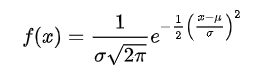


where Mu is mean and Sigma is standard deviation.

seanborn box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

Boxplot, box indicates the interquartile Range(IQR) with median as central line. Maximum value that is the line end at top is equal to Q3 + 1.5 IQR and minimum line at bottom is equal to Q1 - 1.5 IQR. If there is any circle outside the extreme lines, it indicates there is outlier in the data



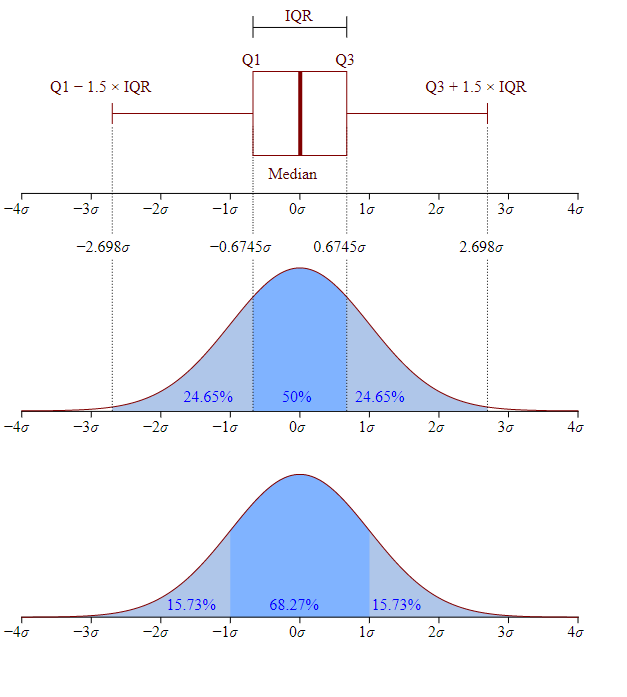




# Empirical rule

The empirical rule, or the 68-95-99.7 rule, tells you where most of your values lie in a normal distribution:

* Around 68% of values are within 1 standard deviation from the mean.
* Around 95% of values are within 2 standard deviations from the mean.
* Around 99.7% of values are within 3 standard deviations from the mean.









## To plot Normal Distribution 

In python normal distribution can be implemented by using numpy.linspace() or numpy.arange. Here I am using numpy.linspace() and it take parameters numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0). Where start indicates starting and end indicates ending value of the sequence. We can also set stop as false then it will take num+1, where num is by default 50. 


Numpy.linspace() returns  num equally spaced samples in the closed interval [start, stop] or the half-open interval [start, stop) (depending on whether endpoint is True or False).

norm.pdf() from scipy.stats can be used to calculate pdf.


## Normal Distribution Curve

In [5]:
x_axis = np.linspace(-10, 10, 100)
pdf = norm.pdf(x_axis,0,2)

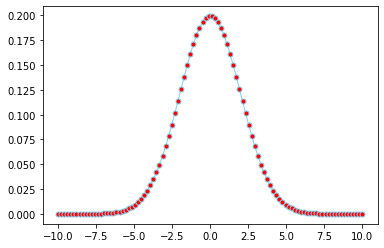

In [6]:
plt.plot(x_axis, pdf, marker='o', markerfacecolor='red', markersize=5, color='skyblue', linewidth=1)
plt.show()

## Box Plot with plotly.express

In [7]:
fig = px.box(df,y=x_axis)
fig.show()

# Skewness

The skewness measures the extend to which the data values are not symmertic around the mean. For normal distribution the  portion of the curve below the mean will be mirror image of the portion of the curve above the mean thus skewness will be zero.

## Distribution curve

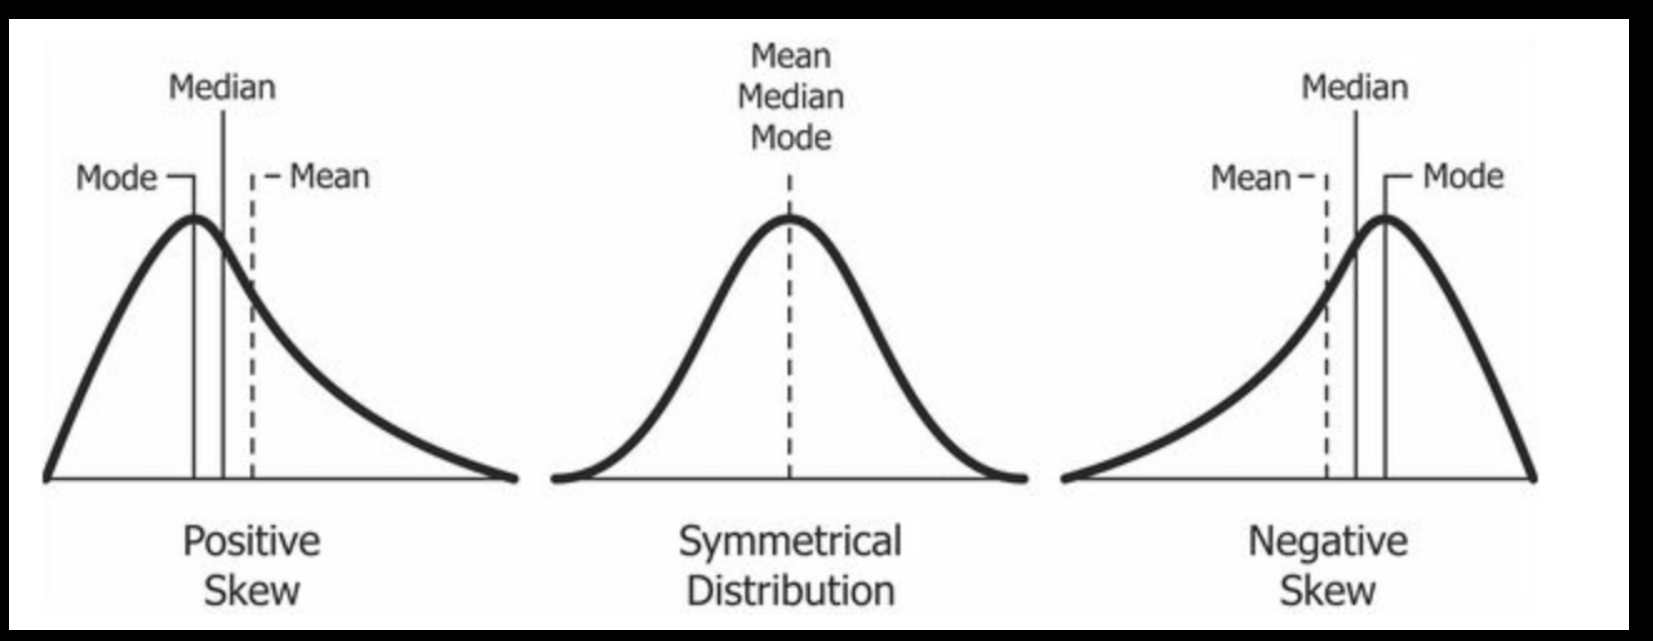


The **dataframe.skew()** method calculates the skew for each column and it return unbiased skew over requested axis. If skew each row is to be calcuated then  dataframe.skew(axis='columns') should be used.

## Box plot distribution

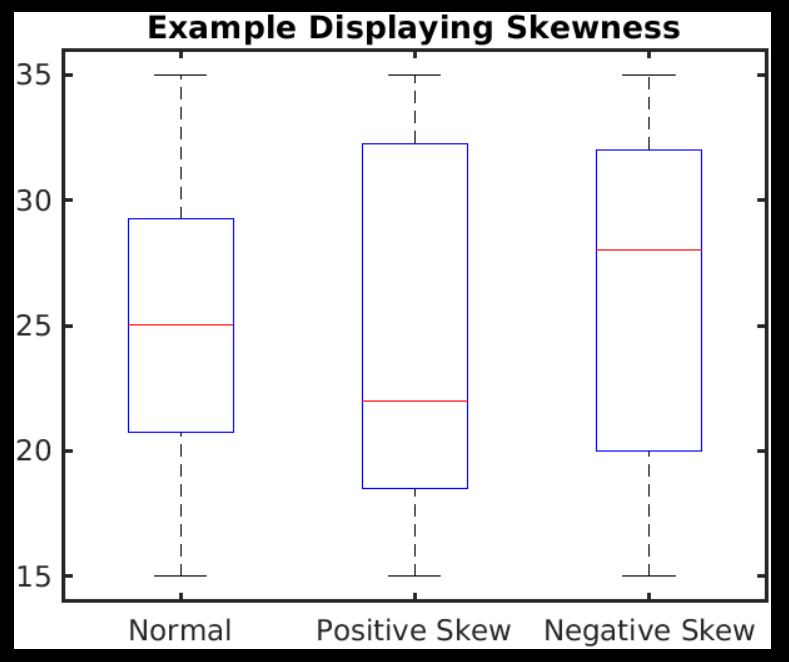

* **Symmetric**:- When the median of the distribution is in the middle of the box, and the whiskers are about the same on both sides of the box.

* **Positively or Right skewed** :- When the median of the distributio is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box.

* **Negatively or skewed** :- When the median of the distribution is closer to the top of the box, and if the whisker is shorter on the upper end of the box.

# Kurtosis

It measures the peakedness of the curve of the distribution or how sharply the curve raises apporaching centre of ditribution. It compares the shape of the peak to shape of the peak of normal distribution.

The excess kurtosis is defined as kurtosis minus 3. There are 3 distinct regimes as described below.

* **Mesokurtic** :-  The kurtosis of any univariate normal distribution is 3 and is called mesokurtic.

* **Leptokurtic** :- The distribution will have a sharper-rising centre of peak, with a higher concentration of values near the mean with a fatter tail that is many values in the tail compared to normal distribution and kurtosis greater than 3 and a positive excess kurtosis.

* **Platykurtic** :- The distribution will have less centre of peak compared to normal distribution and have a negative excess kurtosis.





The below images on the right show curves for the following seven densities, on a linear scale and logarithmic scale:

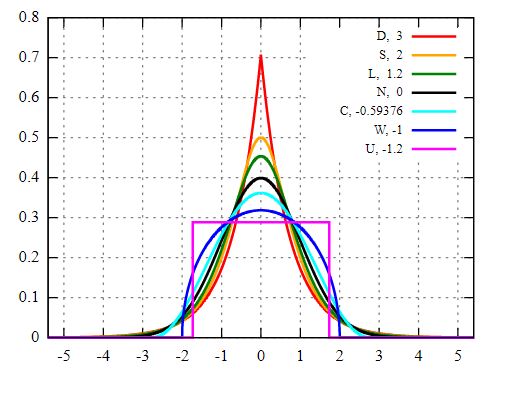

* **D** : Laplace distribution, also known as the double exponential distribution, red curve (two straight lines in the log-scale plot), excess kurtosis = 3

* **S** : hyperbolic secant distribution, orange curve, excess kurtosis = 2

* **L** : logistic distribution, green curve, excess kurtosis = 1.2

* **N** : normal distribution, black curve (inverted parabola in the log-scale plot), excess kurtosis = 0

* **C** : raised cosine distribution, cyan curve, excess kurtosis = −0.593762...

* **W** : Wigner semicircle distribution, blue curve, excess kurtosis = −1

* **U** : uniform distribution, magenta curve (shown for clarity as a rectangle in both images), excess kurtosis = −1.2.


**DataFrame.kurt()** can be used to find the kurtosis of the dataframe and it returns unbiased kurtosis over requested axis.

## Target C(Total cost, in $1000)

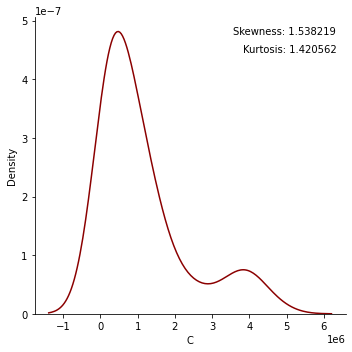

In [8]:
g = sns.displot(data=df, x="C",kind ='kde',color='darkred')
for ax in g.axes.ravel():
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df['C'].skew(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df['C'].kurt(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')

In [9]:
fig = px.box(df,y=df['C'])
fig.show()

## Q(revenue passenger miles)

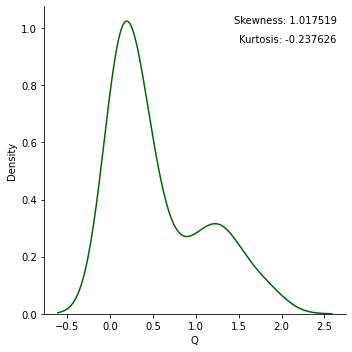

In [10]:
g = sns.displot(data=df, x="Q",kind ='kde',color='darkgreen')
for ax in g.axes.ravel():
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df['Q'].skew(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df['Q'].kurt(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')

In [11]:
fig = px.box(df,y=df['Q'])
fig.show()

## PF (Fuel price)

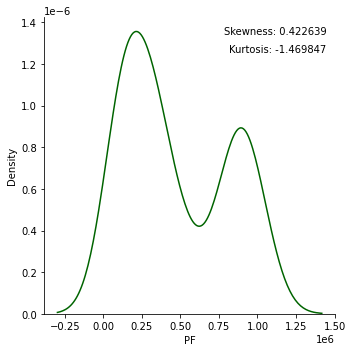

In [12]:
g = sns.displot(data=df, x="PF",kind ='kde',color='darkgreen')
for ax in g.axes.ravel():
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df['PF'].skew(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df['PF'].kurt(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')

In [13]:
fig = px.box(df,y=df['PF'])
fig.show()

## LF(Load factor)

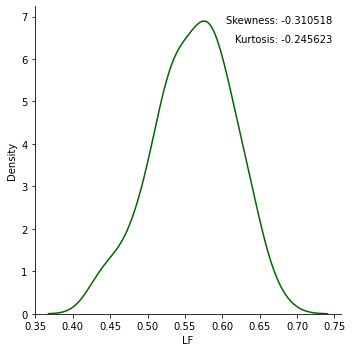

In [14]:
g = sns.displot(data=df, x="LF",kind ='kde',color='darkgreen')
for ax in g.axes.ravel():
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df['LF'].skew(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df['LF'].kurt(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')

In [15]:
fig = px.box(df,y=df['LF'])
fig.show()

# Reference

https://sandhyakrishnan02.medium.com/normal-distribution-and-normality-test-9e2b6e1a7bba

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html

https://en.wikipedia.org/wiki/Skewness#/media/File:Relationship_between_mean_and_median_under_different_skewness.png

https://en.wikipedia.org/wiki/Box_plot#/media/File:Boxplots_with_skewness.png

https://upload.wikimedia.org/wikipedia/commons/3/33/Standard_symmetric_pdfs.svg
